In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord
import os
import numpy as np
import specsim.simulator
from speclite import filters
from speclite import redshift
from astropy.constants import h, c, k_B, sigma_sb
from astropy.cosmology import Planck18
from astropy.table import Table, join
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import bed
from bed.grid import Grid, PermutationInvariant
from bed.design import ExperimentDesigner
from bed.grid import TopHat
import galsim

# local imports
from lsstetc import ETC
from functions import *

In [2]:
# initialize exposure time calculator (ETC) with LSST parameters and a default galaxy profile
band = "i"
pixel_scale = 0.2 # arcsec
stamp_size = 31 # pixels
threshold = 0.0 # threshold for masking 
nvisits = 50 # number of visits
visit_time = 30.0

gal = galsim.Gaussian(flux=1.0, sigma=2) # sigma = 2 arcsec
psf = galsim.Gaussian(fwhm=0.67) # Full-width half-max of the PSF in arcseconds
profile = galsim.Convolve([gal, psf])
etc = ETC(band, profile=profile, pixel_scale=pixel_scale, stamp_size=stamp_size,
              threshold=threshold, nvisits=nvisits, visit_time=visit_time)

In [ ]:
# create an array of redshifts (parameters)
redshifts = np.linspace(0.1, 1.0, 100)

# calculate the model magnitudes for 
model_mags = M_b(redshifts, "i")

In [22]:
# create an array of magnitudes (features)
mags_array = np.linspace(30.0, 20.0, 500)

# use the errors as the sigma value in the Gaussian likelihood
mag_errs = etc.mag_err(mags_array)

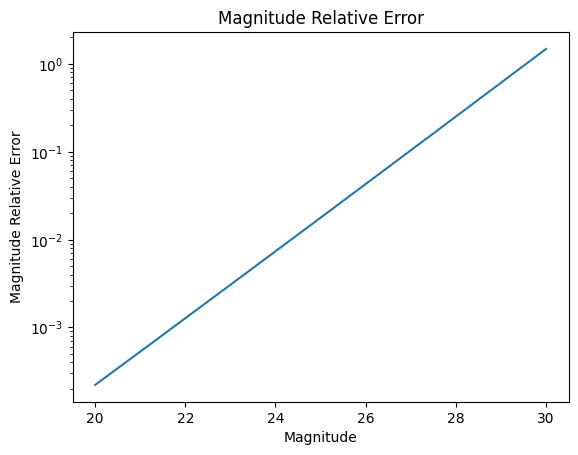

In [23]:
plt.plot(mags_array, mag_errs/mags_array)
plt.xlabel("Magnitude")
plt.ylabel("Magnitude Relative Error")
plt.yscale("log")
plt.title("Magnitude Relative Error")
plt.show()